Enter keyword/hashtag to search about: modi
Enter how many tweets to analyse: 10


How people are reacting on modi by analysing 10 Tweets.
Positive


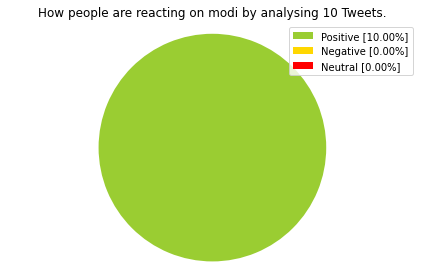

In [1]:
import sys,tweepy
from textblob import TextBlob
import matplotlib.pyplot as plt


def percentage(part, whole):
    return 100 * float(part) / float(whole)


consumerKey = 'ke3C6vLHvU78bl3Vop7LYsSVd'
consumerSecret = 'a4rEcAZsqb8eHCTbesJ3gtue00zv12LeiwUB65RFnjW4Bk3RTV'
accessToken = '1378743560934105088-ubLZghgEPB0j6Pl3FKIlg1xbT5gpgz'
accessTokenSecret = 'I2MY1ZEExYI9OoDb3OlynRPVps2U1YCyYzwDAiFmZSaya'

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

searchTerm = input("Enter keyword/hashtag to search about:")
noOfSearchTerms = int(input("Enter how many tweets to analyse:"))

tweets = tweepy.Cursor(api.search_tweets, q=searchTerm).items(noOfSearchTerms)

neutral = 0
negative = 0
positive = 0
polarity = 0

for tweet in tweets:
    #print(tweet.text)
    analysis = TextBlob(tweet.text)
    polarity += analysis.sentiment.polarity
if (analysis.sentiment.polarity == 0):
        neutral += 1
elif (analysis.sentiment.polarity < 0.00):
        negative += 1
elif (analysis.sentiment.polarity > 0.00):
        positive += 1

positive = percentage(positive, noOfSearchTerms)
negative = percentage(negative, noOfSearchTerms)
neutral = percentage(neutral, noOfSearchTerms)
polarity = percentage(polarity, noOfSearchTerms)


positive = format (positive, '.2f')
negative = format (negative, '.2f')
neutral = format (neutral,'.2f')

print("How people are reacting on " + searchTerm + " by analysing " + str(noOfSearchTerms) + " Tweets.")

if (polarity == 0):
    print("Neutral")
elif (polarity < 0.00):
    print("Negative")
elif (polarity > 0.00):
    print("Positive")

labels = ['Positive ['+str(positive)+'%]' , 'Negative ['+str(negative)+'%]' , 'Neutral ['+str(neutral)+'%]']
sizes = [positive,negative,neutral]
colors = ['yellowgreen', 'gold' , 'red']
patches, text = plt.pie(sizes, colors=colors,startangle=90)
plt.legend(patches, labels, loc="best")
plt.title("How people are reacting on " + searchTerm + " by analysing " + str(noOfSearchTerms) + " Tweets.")
plt.axis('equal')
plt.tight_layout()
plt.show()